In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [19]:
data = pd.read_csv("audio_features_dataset_curated.csv")
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.0000,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.0000,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson,ZAYN",To Begin Again,To Begin Again,57,210826,False,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.0000,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.0000,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,172.00,235.0000,5,-16.393,1,0.0422,0.6400,928.000000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,174.00,117.0000,0,-18.318,0,0.0401,994.0000,976.000000,105.0000,35.0000,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,629.00,329.0000,0,-10.895,0,42.0000,867.0000,0.000000,0.0839,743.0000,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,587.00,506.0000,7,-10.889,1,0.0297,381.0000,0.000000,0.2700,413.0000,135.960,4


In [20]:
data.drop_duplicates(inplace=True)


In [21]:
data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
# Keep only numeric columns
df_numeric = data.select_dtypes(include='number')
df_numeric = df_numeric.drop(columns=["duration_ms"]) #  "key" , "mode",  "time_signature"
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [24]:
# from sklearn.decomposition import PCA

# # Apply PCA with 2 components
# pca = PCA(n_components=15)
# pca_result = pca.fit_transform(df_scaled)

# explained_variance = pca.explained_variance_ratio_
# print("Explained variance ratio:", explained_variance.cumsum())
# since 5 PCA Components only explain 50% of the variance I will not use it

In [34]:
# KMeans model
kmeans = KMeans(n_clusters=11, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit model
kmeans.fit(df_scaled)

data["cluster"] = kmeans.labels_

cluster_map = {
    0: "Acoustic & Instrumental",
    1: "Dancing",
    2: "Acoustic",
    3: "Energetic",
    4: "Loud & Energetic",
    5: "Instrumental",
    6: "Speechy",
    7: "Lively Music",
    8: "Energetic Dance",
    9: "Low Energy",
    10: "Dance"
}

data["cluster_name"] = data["cluster"].map(cluster_map)

In [35]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster,cluster_name
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,676.00,461.0000,1,...,0,143.0000,0.0322,0.000001,358.0000,715.0000,87.917,4,8,Energetic Dance
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,166.0000,1,...,1,0.0763,924.0000,0.000006,101.0000,267.0000,77.489,4,9,Low Energy
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson,ZAYN",To Begin Again,To Begin Again,57,210826,False,438.00,359.0000,0,...,1,0.0557,0.2100,0.000000,117.0000,0.1200,76.332,4,10,Dance
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,266.00,0.0596,0,...,1,0.0363,905.0000,0.000071,132.0000,143.0000,181.740,3,2,Acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,618.00,443.0000,2,...,1,0.0526,469.0000,0.000000,0.0829,167.0000,119.949,4,10,Dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,172.00,235.0000,5,...,1,0.0422,0.6400,928.000000,0.0863,0.0339,125.995,5,5,Instrumental
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,174.00,117.0000,0,...,0,0.0401,994.0000,976.000000,105.0000,35.0000,85.239,4,0,Acoustic & Instrumental
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,629.00,329.0000,0,...,0,42.0000,867.0000,0.000000,0.0839,743.0000,132.378,4,9,Low Energy
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,587.00,506.0000,7,...,1,0.0297,381.0000,0.000000,0.2700,413.0000,135.960,4,10,Dance


In [33]:
df_numeric["cluster"] = kmeans.labels_
print(df_numeric.groupby("cluster").mean())

         popularity  danceability      energy       key    loudness      mode  \
cluster                                                                         
0         29.743521    357.358018  149.067638  4.962743  -19.519309  0.631210   
1          2.805411    650.901804  658.987819  5.522244   -6.448161  0.684770   
2         30.508413    394.348220  341.528780  5.073215  -10.888225  0.768076   
3         37.739232     42.087204  672.199701  5.435778   -6.572937  0.661622   
4         44.941176    514.281471  848.703235  5.117647 -807.264706  0.647059   
5         35.495583    588.622777  613.021334  5.556163   -8.992966  0.519142   
6         39.793333    641.523014  613.451132  5.790769   -7.107056  0.493846   
7         35.165588    460.582379  665.700675  5.240022   -6.970084  0.696332   
8         50.888932    610.189299  660.370275  5.945721   -6.129079  0.000000   
9         34.641950    468.577701  262.955935  4.955218  -10.673182  0.858571   
10        51.251773    588.8

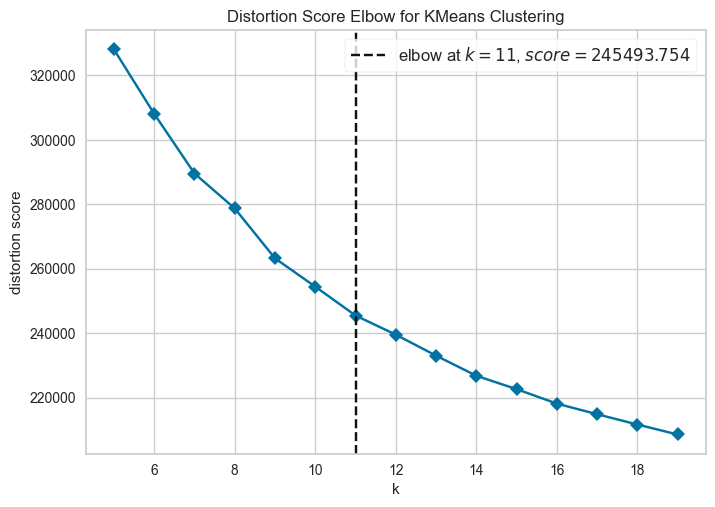

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:

# Use the Elbow visualizer
visualizer = KElbowVisualizer(kmeans, k=(5,20), timings=False)
visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show()                # Display the elbow plot


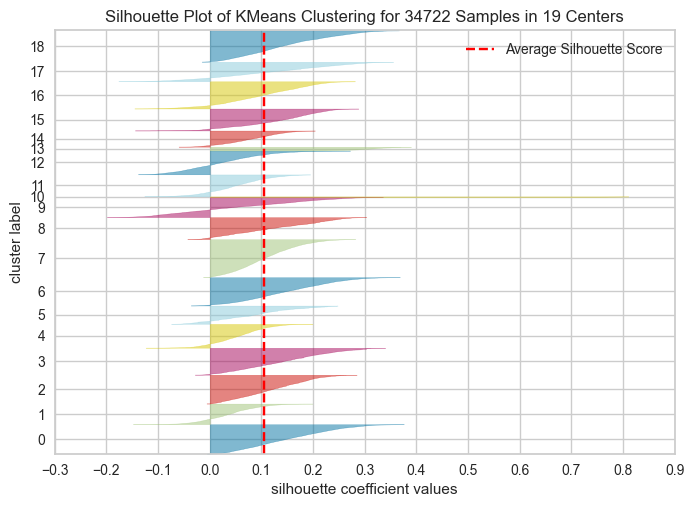

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 34722 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
# Create and fit SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)    # Fit the data to the visualizer
visualizer.show()            # Display the plot

In [29]:
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.0000,87.917,4,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.0000,77.489,4,2
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson,ZAYN",To Begin Again,To Begin Again,57,210826,False,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.1200,76.332,4,2
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.0000,181.740,3,2
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.0000,119.949,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,172.00,235.0000,5,-16.393,1,0.0422,0.6400,928.000000,0.0863,0.0339,125.995,5,4
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,174.00,117.0000,0,-18.318,0,0.0401,994.0000,976.000000,105.0000,35.0000,85.239,4,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,629.00,329.0000,0,-10.895,0,42.0000,867.0000,0.000000,0.0839,743.0000,132.378,4,2
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,587.00,506.0000,7,-10.889,1,0.0297,381.0000,0.000000,0.2700,413.0000,135.960,4,1


# save to csv

In [37]:
data.to_csv("clustered_songs.csv", index=False)